In [ ]:
import os
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.express as px 
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import euclidean_distances
from scipy.spatial.distance import cdist

# Load Dataset from Kaggle

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle datasets download saurabhshahane/spotgen-music-dataset/versions/122

 97% 265M/274M [00:02<00:00, 141MB/s]
100% 274M/274M [00:02<00:00, 125MB/s]


In [ ]:
!unzip spotgen-music-dataset.zip -d data

Archive:  spotgen-music-dataset.zip
  inflating: data/SpotGenTrack/Data Sources/spotify_albums.csv  
  inflating: data/SpotGenTrack/Data Sources/spotify_artists.csv  
  inflating: data/SpotGenTrack/Data Sources/spotify_tracks.csv  
  inflating: data/SpotGenTrack/Features Extracted/low_level_audio_features.csv  
  inflating: data/SpotGenTrack/Features Extracted/lyrics_features.csv  


# Read data

In [ ]:
tracks_dataset=pd.read_csv("data/SpotGenTrack/Data Sources/spotify_tracks.csv")

In [ ]:
tracks_dataset.head()

,Unnamed: 0,acousticness,album_id,analysis_url,artists_id,available_markets,country,danceability,disc_number,duration_ms,...,preview_url,speechiness,tempo,time_signature,track_href,track_name_prev,track_number,uri,valence,type
0,0,0.294,0D3QufeCudpQANOR7luqdr,https://api.spotify.com/v1/audio-analysis/5qlj...,['3mxJuHRn2ZWD5OofvJtDZY'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.698,1.0,235584.0,...,https://p.scdn.co/mp3-preview/1b05a902da3a251d...,0.0262,115.018,4.0,https://api.spotify.com/v1/tracks/5qljLQuKnNJf...,track_14,1.0,spotify:track:5qljLQuKnNJf4F4vfxQB0V,0.6220,track
1,1,0.863,1bcqsH5UyTBzmh9YizdsBE,https://api.spotify.com/v1/audio-analysis/3VAX...,['4xWMewm6CYMstu0sPgd9jJ'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,656960.0,...,https://p.scdn.co/mp3-preview/d8140736a6131cb5...,0.9220,115.075,3.0,https://api.spotify.com/v1/tracks/3VAX2MJdmdqA...,track_3,3.0,spotify:track:3VAX2MJdmdqARLSU5hPMpm,0.5890,track
2,2,0.750,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1L3Y...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.466,1.0,492840.0,...,https://p.scdn.co/mp3-preview/c8af28fb15185b18...,0.9440,79.565,4.0,https://api.spotify.com/v1/tracks/1L3YAhsEMrGV...,track_4,4.0,spotify:track:1L3YAhsEMrGVvCgDXj2TYn,0.0850,track
3,3,0.763,6FeJF5r8roonnKraJxr4oB,https://api.spotify.com/v1/audio-analysis/6aCe...,['2KQsUB9DRBcJk17JWX1eXD'],"['AD', 'AE', 'AR', 'AT', 'AU', 'BE', 'BG', 'BH...",BE,0.719,1.0,316578.0,...,https://p.scdn.co/mp3-preview/7629b8e9f31f6e9b...,0.9380,112.822,3.0,https://api.spotify.com/v1/tracks/6aCe9zzoZmCo...,track_9,1.0,spotify:track:6aCe9zzoZmCojX7bbgKKtf,0.5330,track
4,4,0.770,4tKijjmxGClg4JOLAyo2qE,https://api.spotify.com/v1/audio-analysis/1Vo8...,['3hYaK5FF3YAglCj5HZgBnP'],['GB'],BE,0.460,1.0,558880.0,...,https://p.scdn.co/mp3-preview/32be593c0eb82868...,0.9430,81.260,4.0,https://api.spotify.com/v1/tracks/1Vo802A38tPF...,track_2,2.0,spotify:track:1Vo802A38tPFHmje1h91um,0.0906,track


In [ ]:
data=tracks_dataset[:1000]

# Analyze

In [ ]:
data.shape

(1000, 32)

In [ ]:
data.columns

Index(['Unnamed: 0', 'acousticness', 'album_id', 'analysis_url', 'artists_id',
       'available_markets', 'country', 'danceability', 'disc_number',
       'duration_ms', 'energy', 'href', 'id', 'instrumentalness', 'key',
       'liveness', 'loudness', 'lyrics', 'mode', 'name', 'playlist',
       'popularity', 'preview_url', 'speechiness', 'tempo', 'time_signature',
       'track_href', 'track_name_prev', 'track_number', 'uri', 'valence',
       'type'],
      dtype='object')

array([[<Axes: xlabel='danceability', ylabel='danceability'>,
        <Axes: xlabel='energy', ylabel='danceability'>,
        <Axes: xlabel='instrumentalness', ylabel='danceability'>,
        <Axes: xlabel='liveness', ylabel='danceability'>,
        <Axes: xlabel='loudness', ylabel='danceability'>,
        <Axes: xlabel='popularity', ylabel='danceability'>,
        <Axes: xlabel='tempo', ylabel='danceability'>,
        <Axes: xlabel='valence', ylabel='danceability'>],
       [<Axes: xlabel='danceability', ylabel='energy'>,
        <Axes: xlabel='energy', ylabel='energy'>,
        <Axes: xlabel='instrumentalness', ylabel='energy'>,
        <Axes: xlabel='liveness', ylabel='energy'>,
        <Axes: xlabel='loudness', ylabel='energy'>,
        <Axes: xlabel='popularity', ylabel='energy'>,
        <Axes: xlabel='tempo', ylabel='energy'>,
        <Axes: xlabel='valence', ylabel='energy'>],
       [<Axes: xlabel='danceability', ylabel='instrumentalness'>,
        <Axes: xlabel='energy', ylab

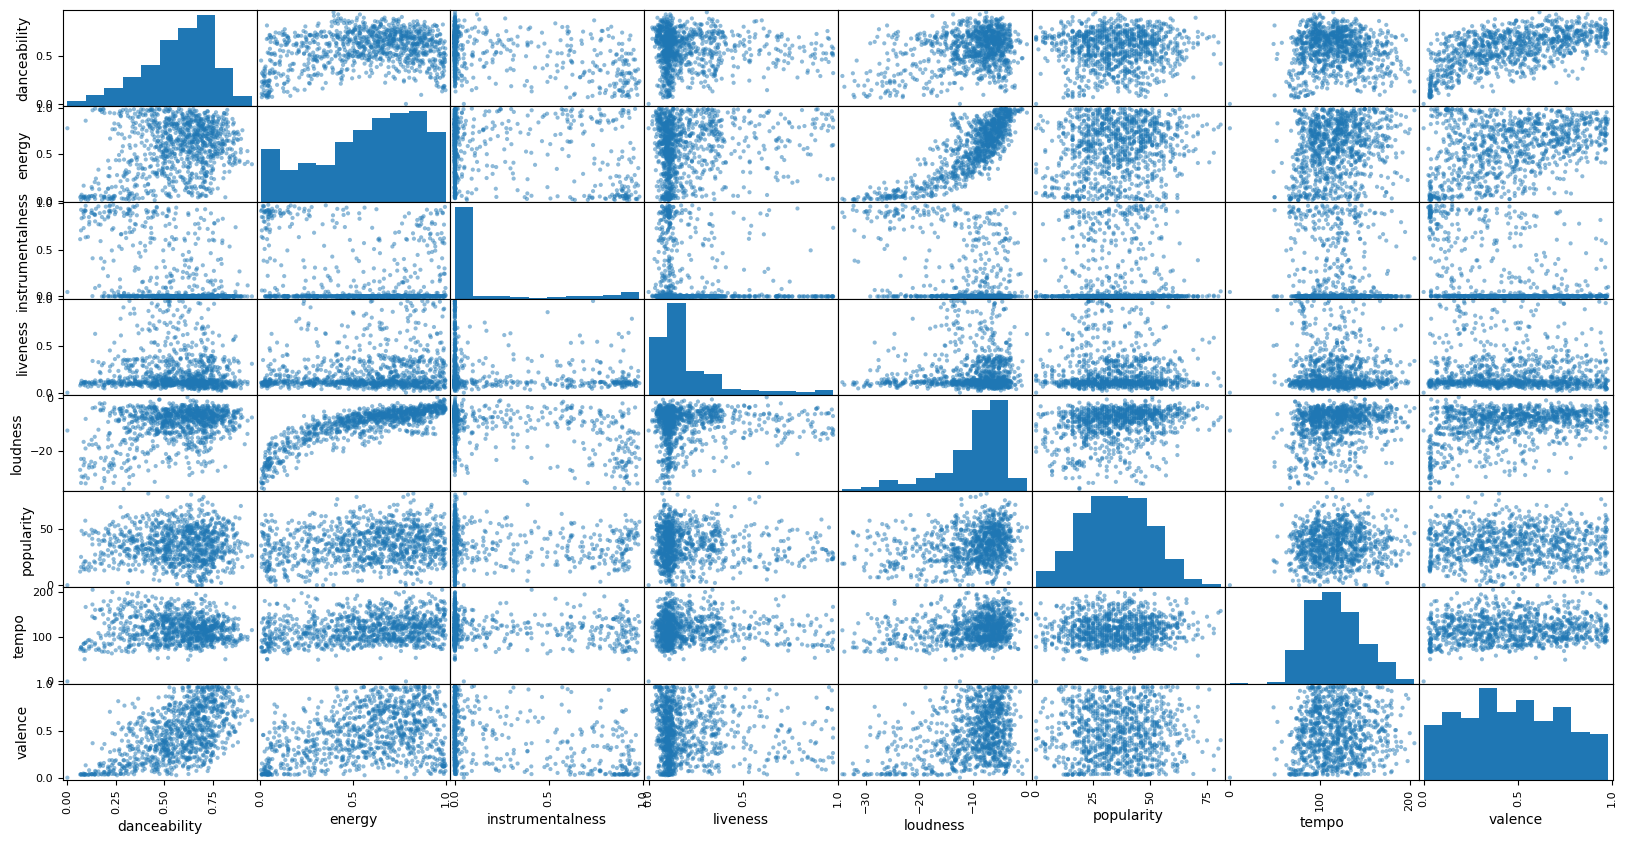

In [ ]:
pd.plotting.scatter_matrix(data[['danceability','energy','instrumentalness','liveness','loudness','popularity','tempo','valence']],figsize=(20,10))

In [ ]:
data[['danceability','energy','instrumentalness','liveness','loudness','popularity','tempo','valence']].corr()

,danceability,energy,instrumentalness,liveness,loudness,popularity,tempo,valence
danceability,1.000000,0.259135,-0.457904,-0.046396,0.355006,0.022864,-0.039475,0.591565
energy,0.259135,1.000000,-0.254379,0.138392,0.826064,0.179367,0.223405,0.384176
instrumentalness,-0.457904,-0.254379,1.000000,-0.101408,-0.436633,-0.037413,-0.062131,-0.377155
liveness,-0.046396,0.138392,-0.101408,1.000000,0.052868,-0.046329,-0.054541,-0.041371
loudness,0.355006,0.826064,-0.436633,0.052868,1.000000,0.250172,0.231072,0.365634
popularity,0.022864,0.179367,-0.037413,-0.046329,0.250172,1.000000,0.078972,0.005455
tempo,-0.039475,0.223405,-0.062131,-0.054541,0.231072,0.078972,1.000000,0.074073
valence,0.591565,0.384176,-0.377155,-0.041371,0.365634,0.005455,0.074073,1.000000


In [ ]:
data[['danceability','energy','instrumentalness','liveness','loudness','popularity','tempo','valence']].head()

,danceability,energy,instrumentalness,liveness,loudness,popularity,tempo,valence
0,0.698,0.606,0.000003,0.151,-7.447,28.0,115.018,0.6220
1,0.719,0.308,0.000000,0.253,-10.340,31.0,115.075,0.5890
2,0.466,0.931,0.000000,0.938,-13.605,31.0,79.565,0.0850
3,0.719,0.126,0.000000,0.113,-20.254,14.0,112.822,0.5330
4,0.460,0.942,0.000000,0.917,-13.749,32.0,81.260,0.0906


# Training

In [ ]:
model=KMeans(n_clusters=5)

# Test